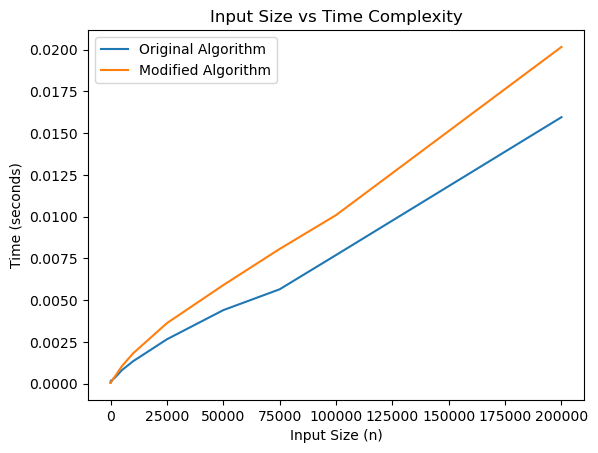

In [30]:
import time
import matplotlib.pyplot as plt
import random
random.seed(10)

def Original_Counting_sort(A,B,k):
    C = [0]*(k+1)
    # print(C)
    for j in range(0,len(A)):
        C[A[j]] += 1
    # print(C)
    
    for i in range(1,k+1):
        C[i]= C[i]+C[i-1]
    # print(C)
    
    for j in range(len(A)-1,-1,-1):
        C[A[j]] = C[A[j]]-1
        B[C[A[j]]] = A[j]

def modified_counting_sort(A,B,k):
    C = [0] * (k + 1)

    for i in range(0, len(A)):
        C[A[i]] += 1
    # print(C)

    CU = 0
    for i in range(0, k + 1):
        temp = C[i]
        C[i] = CU
        CU += temp
    
    # print(C)
    for j in range(1, len(A) + 1):
        B[C[A[j - 1]]] = A[j - 1]
        C[A[j - 1]] += 1
    # print(C)


input_sizes = [5,10,25,50,75,100,250,500,750,1000,2000, 5000, 10000,25000, 50000,75000, 100000,200000]
time_original = []
time_modified = []

for  n in input_sizes:
    
    A = [random.randint(0,1000) for i in range(n)]
    B = [0]*len(A)
    k = max(A)
    start_time = time.time()
    Original_Counting_sort(A,B,k)
    time_original.append(time.time() - start_time)
    
    start_time = time.time()
    modified_counting_sort(A,B,k)
    time_modified.append(time.time()- start_time)

    
        
plt.plot(input_sizes, time_original, label='Original Algorithm')
plt.plot(input_sizes, time_modified, label='Modified Algorithm')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Input Size vs Time Complexity')
plt.legend()
plt.show()


In [45]:
import networkx as nx

# N,M = input().split()
# print(N," ",M)
graph = nx.Graph()
graph.add_edge(1, 2, w=1)
graph.add_edge(1, 4, w=5)
graph.add_edge(2, 3, w=2)
graph.add_edge(2, 5, w=1)
graph.add_edge(2, 4, w=2)
graph.add_edge(3, 6, w=2)
graph.add_edge(3, 5, w=3)
graph.add_edge(5, 6, w=2)


shortest_path = nx.shortest_path(graph, source=1, target=4, weight='w')
print(type(shortest_path))
print("Shortest Path:", shortest_path)
path_weight = sum(graph[shortest_path[i]][shortest_path[i + 1]]['w'] 
for i in range(len(shortest_path) - 1))
print("Path Weight:", path_weight)

<class 'list'>
Shortest Path: [1, 2, 4]
Path Weight: 3


In [46]:
import networkx as nx

N,M = map(int,input().split())
print("Number of vertices : ",N," Number of routes : ",M)
X = [0]* M # this is for the first vertex
Y = [0]* M # this is for the second vertex
W = [0]* M # this is for the weight
for i in range(M):
    X[i],Y[i],W[i] = map(int,input().split())
    
X_set = set(X)
Y_set = set(Y)
T = set.union(X_set,Y_set) # this is for the total number of vertices
T = list(T)

graph = nx.Graph()
for i in range(M):
    graph.add_edge(X[i],Y[i],w=W[i])
    
for i in range(N-1):
    shortest_path = nx.shortest_path(graph,source = T[0],target = T[i+1],weight = 'w')
    path_weight = sum(graph[shortest_path[j]][shortest_path[j + 1]]['w'] 
    for j in range(len(shortest_path) - 1)) 
    print(T[0]," ",T[i+1]," ",path_weight)
    


Number of vertices :  6  Number of routes :  8
1   2   1
1   3   3
1   4   3
1   5   2
1   6   4


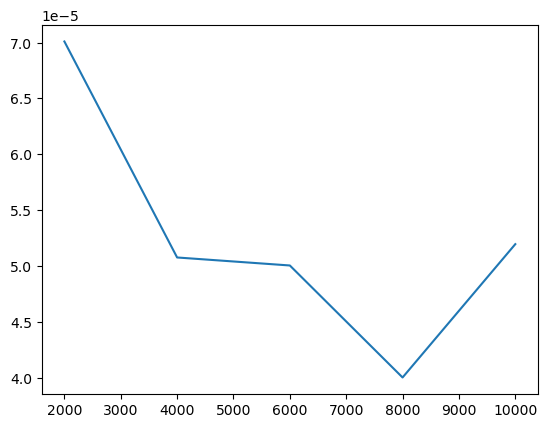

In [86]:
import networkx as nx
import time 
import random
Num_cities = [2000,4000,6000,8000,10000]
Num_paths = [4000,8000,12000,16000,20000]
time_counts = []

for m in Num_paths:
    X = [random.randint(0,2000) for i in range(m)]
    Y = [random.randint(0,2000) for i in range(m)]
    W = [random.randint(0,2000) for i in range(m)]
    
    
            
    X_set = set(X)
    Y_set = set(Y)
    T = set.union(X_set,Y_set) # this is for the total number of vertices
    T = list(T)
    # print(T)
    # print(X)
    # print(Y)
    start_time = time.time()
    graph = nx.Graph()
    for i in range(M):
        graph.add_edge(X[i],Y[i],w=W[i])
        shortest_path = nx.shortest_path(graph,source = X[0],target = Y[0],weight = 'w')
        path_weight = sum(graph[shortest_path[j]][shortest_path[j + 1]]['w'] 
        for j in range(len(shortest_path) - 1)) 
        # print(T[0]," ",T[i+1]," ",path_weight)
    end_time = time.time()
    time_counts.append(end_time - start_time)

plt.plot(Num_cities,time_counts)
plt.show()